## Observations and Insights 

# Import Dependencies

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Import data into Panda 

In [79]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [80]:
# See the DF's and how to merge
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [81]:
# See the DF's and how to merge
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Combine the dataframes

In [82]:
# Combine the data into a single dataset
# Use Mouse ID's bc it's the commonality b/ween the two DFs
combined_df = pd.merge(mouse_metadata,study_results, how="left", on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [83]:
# Also use .info to evaluate all the data types and columns are correct
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


# Clean the merged DFs to remove duplicates

In [84]:
# Checking the number of mice.
num_mice = len(combined_df["Mouse ID"].unique())
print(num_mice)

249


In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique

In [86]:
# Optional: Get all the data for the duplicate mouse ID. 
# When printing, Mouse ID g989 shows as a duplicate 
dup_g989= combined_df[combined_df["Mouse ID"]== 'g989']

In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [88]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df["Mouse ID"].unique())
print(f"There was a total of {num_mice_clean} mice that were used in each experiment for the total research project.")

There was a total of 248 mice that were used in each experiment for the total research project.


# Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
# Formatted to 2 decimals with .round(2)
stat_df = pd.DataFrame({"Avg Tumor Vol":mean, "Median Tumor Vol":median,
                       "Variance": variance, "Std Dev":stddev, "SEM":sem}).round(2)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_df

,Avg Tumor Vol,Median Tumor Vol,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [101]:
# Using the aggregation method, produce the same summary statistics in a single line
???

# Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

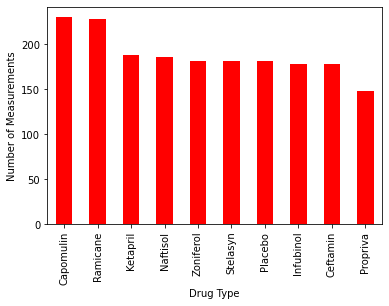

In [103]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Note: there is one mouse used per measurement

drug_regimens = clean_df ["Drug Regimen"].value_counts()
drug_regimens.plot(kind="bar", facecolor='red')

#Format the bar plot
y_axis = drug_regimens.values
x_axis = drug_regimens.index
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Type")
plt.show


In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
